# DTEK0087
# Analysis and Programming for Health Wearables 2021

Lauri Orava

516761

Analysis Exercise 3

In [67]:
import pandas as pd
import numpy as np 
import scipy.signal as signal
from scipy import interpolate
import os
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
%matplotlib inline

### 0 - Data initialization and resampling

In [68]:
data = os.path.join(os.getcwd(), 'data', 'ecg_ppg_clean.csv')
df = pd.read_csv(data)
df.head()

,timestamps_ecg,ecg,timestamps_ppg_1_green,ppg_1_green,timestamps_ppg_1_red,ppg_1_red,timestamps_ppg_1_ir,ppg_1_ir,timestamps_ppg_2_green,ppg_2_green,timestamps_ppg_2_red,ppg_2_red,timestamps_ppg_2_ir,ppg_2_ir
0,725290.0,-1949.000000,725314.0,31289.000000,725314.0,2.274565e+06,725314.0,2.544369e+06,725301.0,28101.000000,725301.0,2.534342e+06,725301.0,2.540145e+06
1,725368.0,-1737.708861,725414.0,31255.336634,725414.0,2.274575e+06,725414.0,2.544328e+06,725401.0,28117.666667,725401.0,2.534269e+06,725401.0,2.539954e+06
2,725446.0,-1534.215190,725514.0,31204.029703,725514.0,2.274564e+06,725514.0,2.544304e+06,725501.0,28114.156863,725501.0,2.534142e+06,725501.0,2.539586e+06
3,725524.0,-1413.556962,725614.0,31186.504950,725614.0,2.274553e+06,725614.0,2.544289e+06,725601.0,28101.764706,725601.0,2.533956e+06,725601.0,2.539082e+06
4,725602.0,-1333.050633,725714.0,31166.029412,725714.0,2.274524e+06,725714.0,2.544271e+06,725701.0,28083.490196,725701.0,2.533720e+06,725701.0,2.538444e+06


In [69]:
ecg_signal = (df['ecg'].to_numpy())
ecg_time = (df['timestamps_ecg'].to_numpy()-df['timestamps_ecg'][0])/10000

ir_signal = (df['ppg_1_ir'].dropna().to_numpy()*-1)
ir_time = (df['timestamps_ppg_1_ir'].dropna().to_numpy()-df['timestamps_ppg_1_ir'][0])/10000


## Resample
fs = 200
T_ecg = ecg_time[-1]
T_ppg = ir_time[-1]
n_ecg = int(fs*T_ecg)
n_ppg = int(fs*T_ppg)

resampled_ecg = signal.resample(ecg_signal, n_ecg, ecg_time)[0]
resampled_ppg = signal.resample(ir_signal, n_ppg, ir_time)[0]

### 1 - Signal segmentation

In [70]:
def slicing(sig, file_label, segment_length):

    sig_sliced = []
    label = []

    for i in np.arange(int(len(sig)/segment_length)):
        sig_sliced.append(sig[i*segment_length:(i+1)*segment_length])
        label.append(file_label)

    return (sig_sliced, label)

ecg_sliced, label = slicing(resampled_ecg, "ecg", segment_length=10*fs)
print(np.shape(ecg_sliced))
print(label)

(12, 2000)
['ecg', 'ecg', 'ecg', 'ecg', 'ecg', 'ecg', 'ecg', 'ecg', 'ecg', 'ecg', 'ecg', 'ecg']


### 2 - Ensemble averaged waveform

In [71]:
def normalize(sig):
    sig = sig - np.min(sig)
    sig = sig/np.max(sig)
    return sig

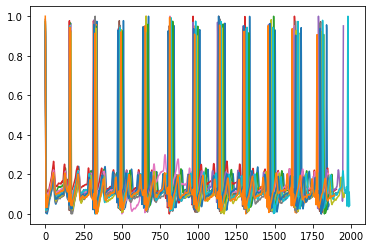

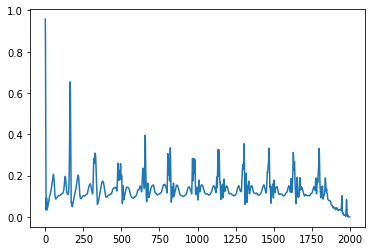

In [83]:
def ensemble_average(signal_segments):

    average = np.zeros((2000))

    for segment in signal_segments:
        segment = normalize(segment)
        peaks_indices = find_peaks(segment, height = 0.5)[0]
        first_peak = peaks_indices[0]
        plt.plot(segment[first_peak:])
        average = [x+y for x, y in zip(average, np.concatenate((np.array(segment[first_peak:]),np.zeros(first_peak))))]

    plt.show()
    plt.close()
    plt.plot(np.array(average)/ len(signal_segments))
    plt.show()

ensemble_average(ecg_sliced)

### 3- Time intervals for EAW